<h3>Outlier detection using IQR
<h3>used when Data is skewed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\placement.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_23220\2535591610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

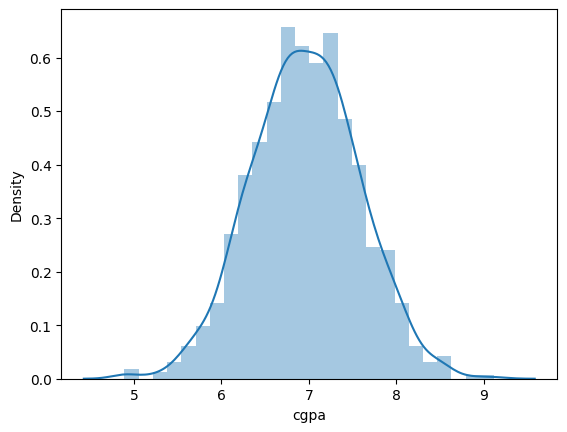

In [7]:
sns.distplot(df['cgpa'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_23220\2541405458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

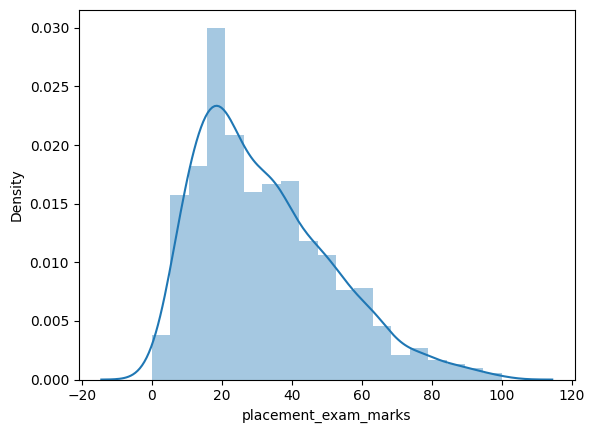

In [8]:
sns.distplot(df['placement_exam_marks'])

In [9]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [12]:
print(df['placement_exam_marks'].describe())
df['placement_exam_marks'].skew()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64


np.float64(0.8356419499466834)

<Axes: ylabel='placement_exam_marks'>

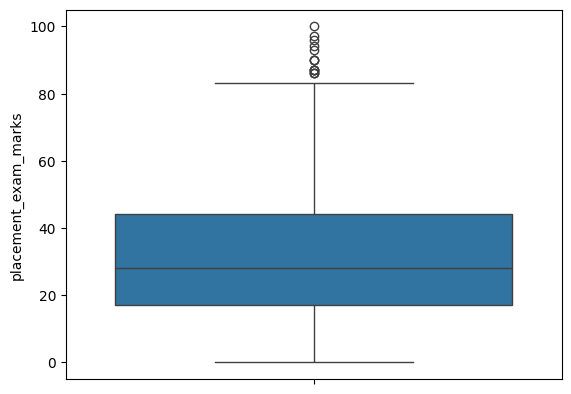

In [13]:
sns.boxplot(df['placement_exam_marks'])

In [15]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [16]:
percentile25

np.float64(17.0)

In [17]:
percentile75

np.float64(44.0)

In [18]:
iqr = percentile75-percentile25

In [21]:
iqr

np.float64(27.0)

In [22]:
lower_limit = percentile25-(1.5*iqr)
upper_limit = percentile75+(1.5*iqr)

In [23]:
print(lower_limit)
print(upper_limit)

-23.5
84.5


In [29]:
df_n = df[(df['placement_exam_marks']<upper_limit) & (df['placement_exam_marks']>lower_limit)]

In [30]:
df_n.shape

(985, 3)

In [24]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks']<lower_limit,
    lower_limit,
    np.where(
        df['placement_exam_marks']>upper_limit,
        upper_limit,
        df['placement_exam_marks']
    )
)

In [25]:
df.shape

(1000, 3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_23220\2541405458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

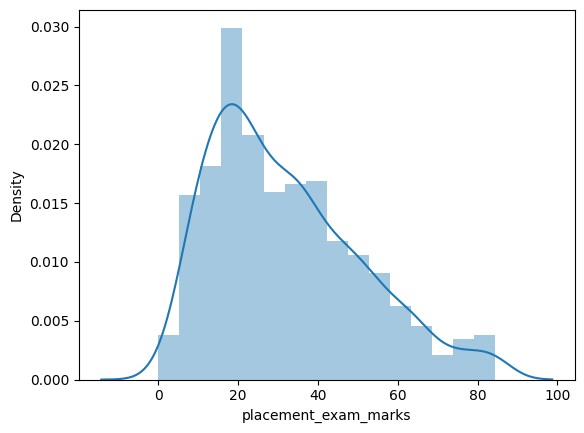

In [31]:
sns.distplot(df['placement_exam_marks'])

In [32]:
df['placement_exam_marks'].skew()

np.float64(0.7566838441374795)